In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import random
from mpl_toolkits import mplot3d
import math
import copy
from statistics import mean 


In [3]:
#create directed chain of nodes with given n
def createDirectedChain(n=50):
    G = nx.DiGraph()
    for i in range(n-1):
        #create edges
        G.add_edge(i, i+1)
    return G

In [4]:
#create random directed network with given n and probability
def createRandomGraph(n=50, p=0.15):
    G = nx.DiGraph()
    G.add_nodes_from(list(range(n)))
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G.add_edge(i,j)
    return G

In [5]:
def violationScore(G, ordering):
    v = 0
    for (i,j) in G.edges:
        v += (ordering[i] < ordering[j])
    return v

def MVR(G):
    #create random ordering
    ordering = list(range(len(G)))
    random.shuffle(ordering)
    #get initial violations score
    violation = violationScore(G, ordering)
    vList = [violation]
    #run algorithm
    t = 1
    timeSinceSwap = 0
    stoppingPoint = math.factorial(len(G))*2/math.factorial(len(G)-2)
    while(timeSinceSwap < stoppingPoint):
        #pick 2 random nodes
        nodeI = random.randint(0,len(G)-1)
        nodeJ = random.randint(0,len(G)-1)
        #create new proposed ordering with swap
        proposedO = copy.deepcopy(ordering)
        temp = proposedO[nodeI]
        proposedO[nodeI] = proposedO[nodeJ]
        proposedO[nodeJ] = temp
        #get violations score for proposed ordering
        proposedV = violationScore(G, proposedO)
        #decide which ordering to keep
        if proposedV < violation:
            violation = proposedV
            ordering = proposedO
            timeSinceSwap = 0
        elif proposedV == violation:
            ordering = proposedO
            timeSinceSwap += 1
        else:
            timeSinceSwap += 1
        #increment time steps
        vList.append(violation)
        t += 1
    return (t, vList)

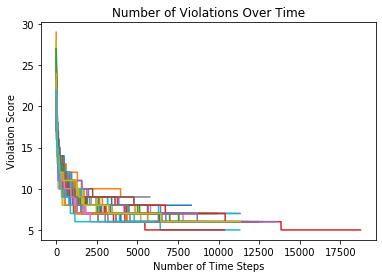

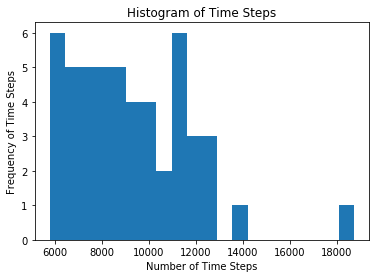

In [55]:
#test on directed chain
numTests = 50
G = createDirectedChain(50)
timeStepsList = []
#create line plot
plt.figure()
plt.xlabel("Number of Time Steps")
plt.ylabel("Violation Score")
plt.title("Number of Violations Over Time")
for t in range(numTests):
    #run MVR on graph
    (timeSteps, violations) = MVR(G)
    #plot violations
    plt.plot(list(range(timeSteps)),violations)
    #add timesteps to list for histo
    timeStepsList.append(timeSteps)
plt.savefig("ChainList.png")
#create histogram of times
plt.figure()
plt.xlabel("Number of Time Steps")
plt.ylabel("Frequency of Time Steps")
plt.title("Histogram of Time Steps")
plt.hist(timeStepsList, bins=20)
plt.savefig("ChainHist.png")

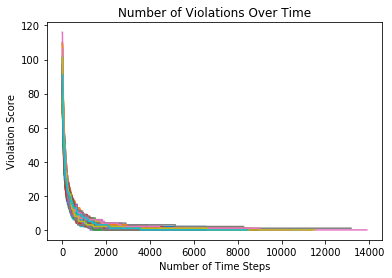

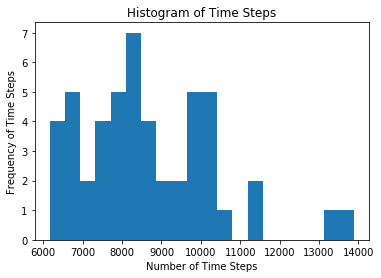

In [52]:
#test on random graphs
numTests = 50
timeStepsList = []
#create line plot
plt.figure()
plt.xlabel("Number of Time Steps")
plt.ylabel("Violation Score")
plt.title("Number of Violations Over Time")
for t in range(numTests):
    #create graph
    G = createRandomGraph()
    #run MVR on graph
    (timeSteps, violations) = MVR(G)
    #plot violations
    plt.plot(list(range(timeSteps)),violations)
    #add timesteps to list for histo
    timeStepsList.append(timeSteps)    
plt.savefig("RandomLine.png")
#create histogram of times
plt.figure()
plt.xlabel("Number of Time Steps")
plt.ylabel("Frequency of Time Steps")
plt.title("Histogram of Time Steps")
plt.hist(timeStepsList, bins = 20)
plt.savefig("RandomHist.png")

In [6]:
#create random directed network with given n and probability
def createRandomDiGraph(n=50, p=0.15):
    G = nx.DiGraph()
    G.add_nodes_from(list(range(n)))
    for i in range(n):
        for j in range(n):
            if not i == j and random.random() < p:
                G.add_edge(i,j)
    return G

10, 0.0
10, 0.2
10, 0.4
10, 0.6000000000000001
10, 0.8
10, 1.0
30, 0.0
30, 0.2
30, 0.4
30, 0.6000000000000001
30, 0.8


C:\Users\cassi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
C:\Users\cassi\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


30, 1.0
50, 0.0
50, 0.2
50, 0.4
50, 0.6000000000000001
50, 0.8


KeyboardInterrupt: 

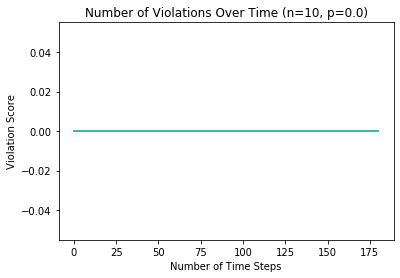

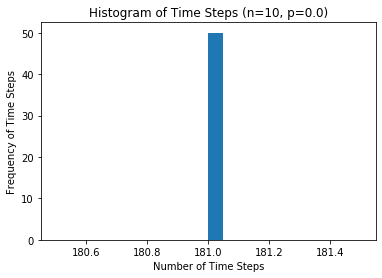

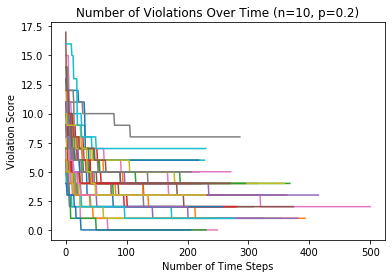

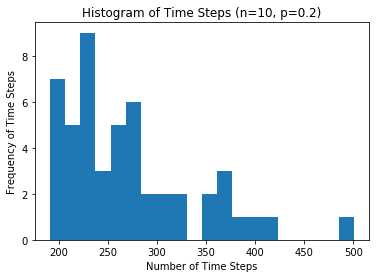

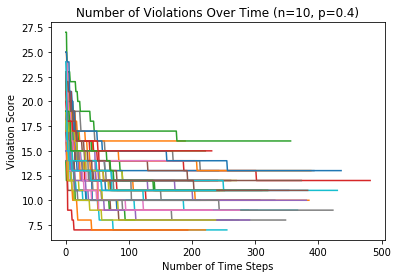

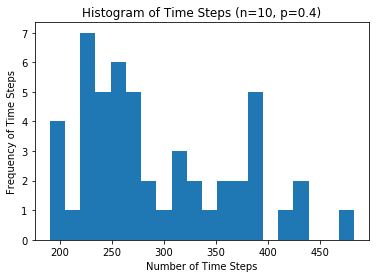

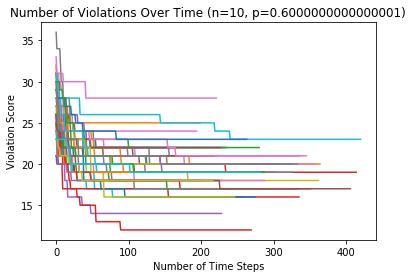

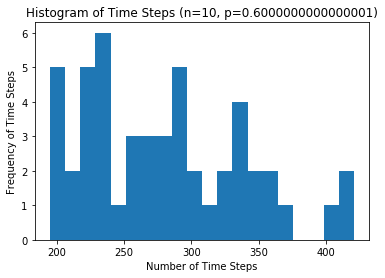

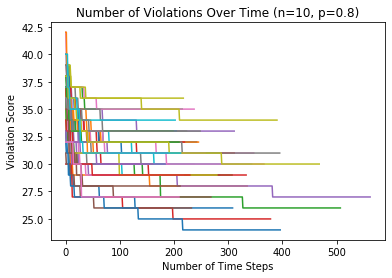

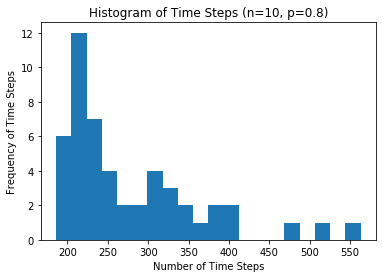

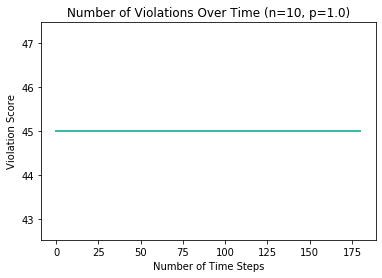

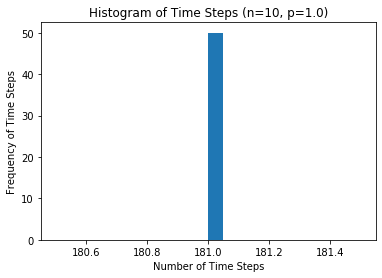

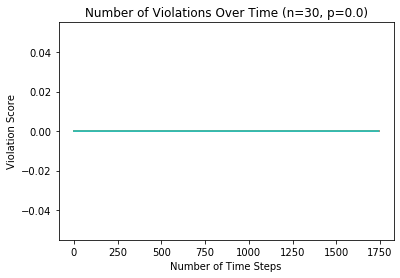

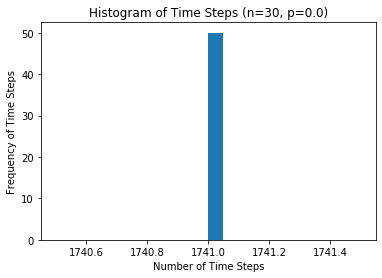

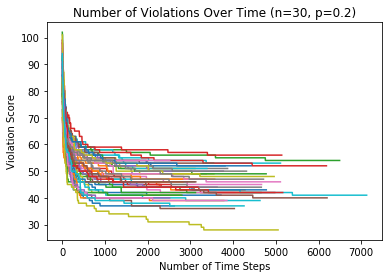

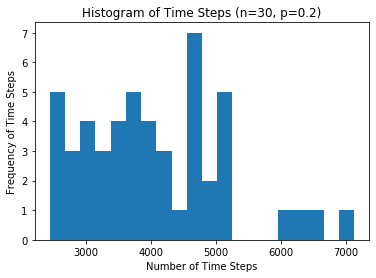

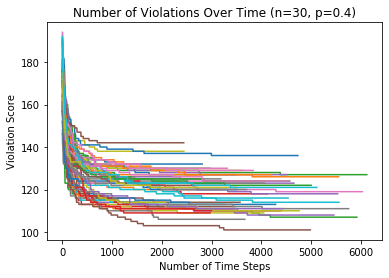

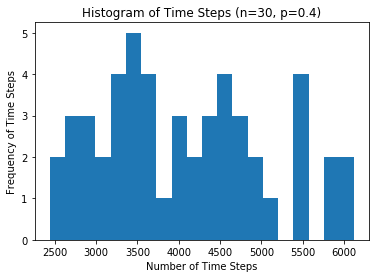

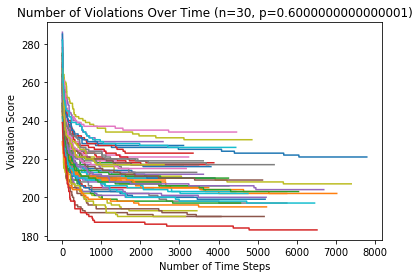

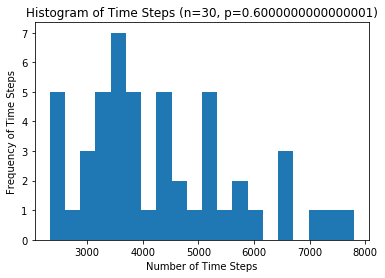

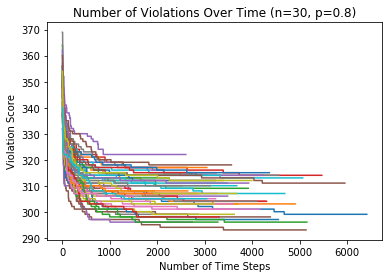

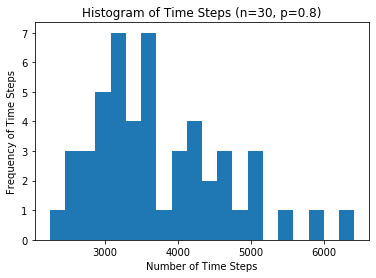

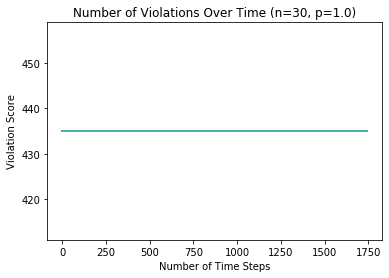

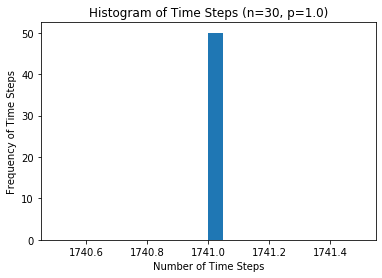

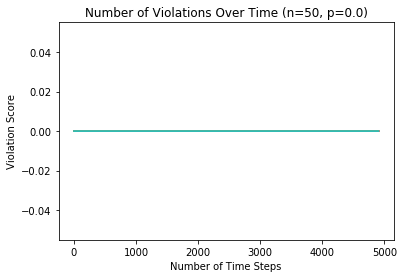

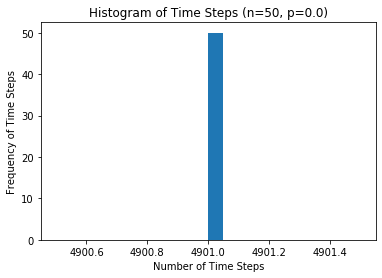

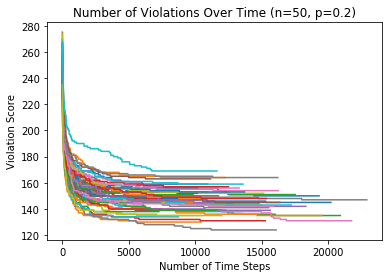

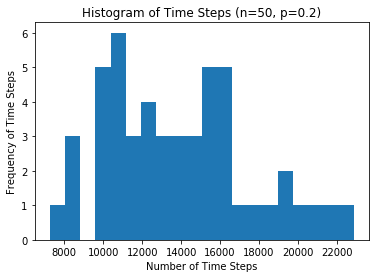

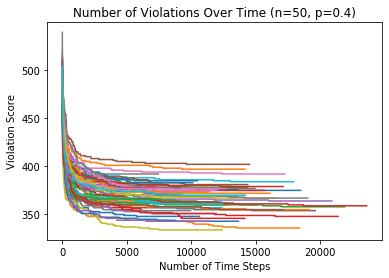

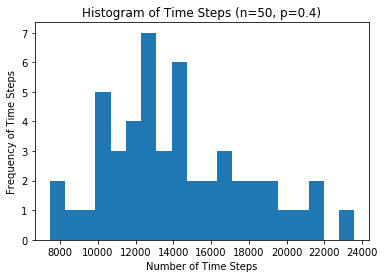

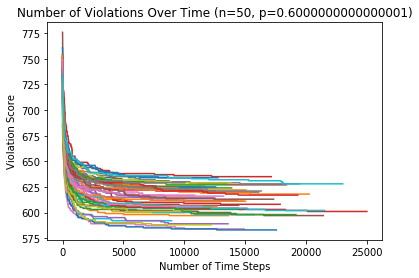

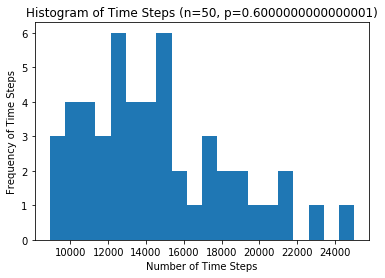

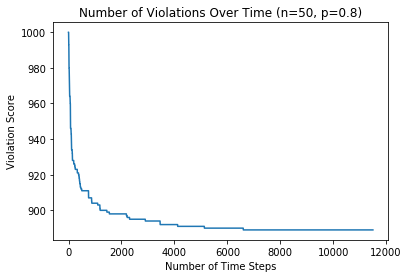

In [15]:
#test on random graphs
numTests = 50
for n in range(10,51,20):
    for p in np.arange(0,1.05,0.2):
        print(str(n)+", "+str(p))
        #create line plot
        plt.figure()
        plt.xlabel("Number of Time Steps")
        plt.ylabel("Violation Score")
        plt.title("Number of Violations Over Time (n="+str(n)+", p="+str(p)+")")
        timeStepsList = []
        for t in range(numTests):
            #create graph
            G = createRandomDiGraph(n,p)
            #run MVR on graph
            (timeSteps, violations) = MVR(G)
            #plot violations
            plt.plot(list(range(timeSteps)),violations)
            #add timesteps to list for histo
            timeStepsList.append(timeSteps)    
        #create histogram of times
        plt.figure()
        plt.xlabel("Number of Time Steps")
        plt.ylabel("Frequency of Time Steps")
        plt.title("Histogram of Time Steps (n="+str(n)+", p="+str(p)+")")
        plt.hist(timeStepsList, bins = 20)


In [32]:
#test on random graphs
numTests = 20
minSteps = []
maxSteps = []
aveSteps = []
probs = np.arange(0.01,1.05,0.1)
n = np.arange(10,80,5)
for nval in n:
    minS = []
    maxS = []
    aveS = []
    for p in probs:
        maxV = []
        minV = []
        aveV = []
        print(str(nval)+", "+str(p))
        for t in range(numTests):
            #create graph
            G = createRandomDiGraph(nval,p)
            #run MVR on graph
            (timeSteps, violations) = MVR(G)
            violations[:] = [x / (len(G.edges)+1) for x in violations]
            #add timesteps to list for histo
            aveV.extend(violations)
            maxV.append(violations[0])
            minV.append(violations[timeSteps-1])
        minS.append(mean(minV))
        maxS.append(mean(maxV))
        aveS.append(mean(aveV))
    minSteps.append(minS)
    maxSteps.append(maxS)
    aveSteps.append(aveS)
    
'''
data_array = np.array(histo2D)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              probs )

x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
ax.set_title("Histogram of Time Steps For n=50")
ax.set_xlabel("")
ax.set_ylabel("Community Structure Strength")
ax.set_zlabel("Frequency")
plt.savefig("length_2d.png")

plt.show()
'''

10, 0.01
10, 0.11
10, 0.21000000000000002
10, 0.31000000000000005
10, 0.41000000000000003
10, 0.51
10, 0.6100000000000001
10, 0.7100000000000001
10, 0.81
10, 0.91
10, 1.01
15, 0.01
15, 0.11
15, 0.21000000000000002
15, 0.31000000000000005
15, 0.41000000000000003
15, 0.51
15, 0.6100000000000001
15, 0.7100000000000001
15, 0.81
15, 0.91
15, 1.01
20, 0.01
20, 0.11
20, 0.21000000000000002
20, 0.31000000000000005
20, 0.41000000000000003
20, 0.51
20, 0.6100000000000001
20, 0.7100000000000001
20, 0.81
20, 0.91
20, 1.01
25, 0.01
25, 0.11
25, 0.21000000000000002
25, 0.31000000000000005
25, 0.41000000000000003
25, 0.51
25, 0.6100000000000001
25, 0.7100000000000001
25, 0.81
25, 0.91
25, 1.01
30, 0.01
30, 0.11
30, 0.21000000000000002
30, 0.31000000000000005
30, 0.41000000000000003
30, 0.51
30, 0.6100000000000001
30, 0.7100000000000001
30, 0.81
30, 0.91
30, 1.01
35, 0.01
35, 0.11
35, 0.21000000000000002
35, 0.31000000000000005
35, 0.41000000000000003
35, 0.51
35, 0.6100000000000001
35, 0.710000000000

'\ndata_array = np.array(histo2D)\n\nfig = plt.figure(figsize=(10,7))\nax = fig.add_subplot(111, projection=\'3d\')\n\nx_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),\n                              probs )\n\nx_data = x_data.flatten()\ny_data = y_data.flatten()\nz_data = data_array.flatten()\nax.bar3d( x_data,\n          y_data,\n          np.zeros(len(z_data)),\n          1, 1, z_data )\nax.set_title("Histogram of Time Steps For n=50")\nax.set_xlabel("")\nax.set_ylabel("Community Structure Strength")\nax.set_zlabel("Frequency")\nplt.savefig("length_2d.png")\n\nplt.show()\n'

In [33]:
#normalized
print(maxSteps)
print(minSteps)
print(aveSteps)

[[0.175, 0.4085816960816961, 0.4671862241072767, 0.5213125370844678, 0.5071064869451807, 0.47974497723587695, 0.4997480510462587, 0.4865838781136361, 0.5036346059409609, 0.4957361781085247, 0.4945054945054945], [0.3989285714285714, 0.4768650079433948, 0.49641777467206644, 0.4898604796566266, 0.4875170286035454, 0.5084495651541537, 0.49790088320137316, 0.49563568524555873, 0.505804182848071, 0.4965808245241216, 0.4976303317535545], [0.30226190476190473, 0.49742607820952456, 0.5023230982413677, 0.4968577922907738, 0.48972094859301213, 0.5000055833960596, 0.493988977618441, 0.49975985426978425, 0.49767244793468907, 0.4974659460646065, 0.49868766404199477], [0.39657467532467533, 0.5075523376981942, 0.4890324844596682, 0.5060570457489215, 0.4844650954093502, 0.4952445090681114, 0.4961823243584296, 0.4985342508076139, 0.49745518826415114, 0.4997659178418575, 0.49916805324459235], [0.4523581973581974, 0.4888627851293606, 0.4959925337265337, 0.5010713898026721, 0.49992095771617384, 0.495722792

In [21]:
#absolute
print(maxSteps)
print(minSteps)
print(aveSteps)

#[[0, 3.3, 8.85, 13.1, 18.1, 21.6, 26.85, 32.3, 35.7, 39.95, 45], [0, 10.2, 22.45, 30.95, 42.45, 53.55, 65.3, 75.2, 83.5, 94, 105], [0, 19.55, 39, 57.15, 76.65, 96.15, 112.65, 133.25, 151.85, 170.75, 190], [0, 29.8, 60.4, 92.9, 120.7, 150.9, 181.9, 210.95, 238.1, 270.6, 300], [0, 44.1, 83.15, 126.8, 177.05, 218.95, 259.3, 301.75, 351.45, 394.3, 435], [0, 60.3, 117.3, 179.8, 237.7, 300.35, 359.25, 417.75, 471.4, 534.05, 595], [0, 79.5, 156.65, 226.1, 314.3, 391.9, 467.65, 549.65, 620.9, 700.45, 780], [0, 99.4, 201.05, 292.8, 400.5, 491.7, 596, 689.65, 793.25, 891.6, 990]]
#[[0, 0.5, 2.85, 6.6, 10.25, 14.4, 17.9, 24.55, 30.1, 35.9, 45], [0, 2.2, 9.6, 16.55, 26.15, 37.05, 48.55, 60.15, 70.55, 86.2, 105], [0, 4.75, 16.4, 31.2, 50.55, 68.25, 85.5, 108.15, 130.1, 157.4, 190], [0, 9.35, 30.65, 53.55, 83.3, 110.4, 142.6, 175.65, 207.5, 248.4, 300], [0, 12.9, 42.65, 80.5, 123.95, 161.6, 205.95, 252.3, 308.8, 364.7, 435], [0, 22.4, 66.3, 114.65, 168.65, 232.8, 289.2, 354.2, 419.7, 497.25, 595], [0, 28.8, 88.65, 152.05, 228.95, 303.2, 382.8, 469.1, 554.45, 651.85, 780], [0, 40.4, 115.35, 203.6, 298.05, 387.8, 491.8, 593.25, 709.8, 833.15, 990]]
#[[0, 0.852744030163385, 3.4768126610231875, 7.25800408719346, 11.181349911190054, 15.033618026530982, 19.15316174134096, 25.273310225303295, 30.812713053940243, 36.24838848302535, 45], [0, 2.8819790828640386, 10.731566175098003, 17.6063689217759, 27.597525272054355, 38.64224426866872, 49.53911725705626, 62.021755438859714, 71.64593301435407, 86.74128576126274, 105], [0, 5.578285082685031, 17.93455882352941, 32.79489623041084, 52.731376309190146, 70.55946271304568, 87.09372785258682, 109.80660950796596, 131.47890784510503, 158.361521840444, 190], [0, 10.539366593985449, 32.58315469319702, 55.78004738534439, 85.88750957016296, 112.22092766427389, 145.499929035234, 178.49136260564833, 209.50190850901404, 249.9891419725785, 300], [0, 14.728135057309016, 45.17556834788355, 83.93143416647922, 127.68263687099304, 165.2841272011035, 210.00035763380532, 255.2094791934391, 311.14409358142916, 366.55754053227287, 435], [0, 24.027156790612562, 69.22446482657129, 118.71945923340465, 171.42310751812934, 235.36024810271675, 293.40374773762716, 357.7336852849637, 423.0449121338912, 499.84879137947775, 595], [0, 31.670325679918296, 92.11852262687106, 155.70391061452514, 233.71682594631753, 307.7714290867986, 387.518278156576, 471.7000176772141, 558.2607458811973, 654.7237177155329, 780], [0, 43.43176450314746, 119.90512076132028, 207.82008696474148, 302.7359365466748, 393.19341570680626, 497.031757880719, 597.2608837638295, 714.5439533283139, 836.1122796822548, 990]]

[[0, 3.3, 8.85, 13.1, 18.1, 21.6, 26.85, 32.3, 35.7, 39.95, 45], [0, 10.2, 22.45, 30.95, 42.45, 53.55, 65.3, 75.2, 83.5, 94, 105], [0, 19.55, 39, 57.15, 76.65, 96.15, 112.65, 133.25, 151.85, 170.75, 190], [0, 29.8, 60.4, 92.9, 120.7, 150.9, 181.9, 210.95, 238.1, 270.6, 300], [0, 44.1, 83.15, 126.8, 177.05, 218.95, 259.3, 301.75, 351.45, 394.3, 435], [0, 60.3, 117.3, 179.8, 237.7, 300.35, 359.25, 417.75, 471.4, 534.05, 595], [0, 79.5, 156.65, 226.1, 314.3, 391.9, 467.65, 549.65, 620.9, 700.45, 780], [0, 99.4, 201.05, 292.8, 400.5, 491.7, 596, 689.65, 793.25, 891.6, 990]]
[[0, 0.5, 2.85, 6.6, 10.25, 14.4, 17.9, 24.55, 30.1, 35.9, 45], [0, 2.2, 9.6, 16.55, 26.15, 37.05, 48.55, 60.15, 70.55, 86.2, 105], [0, 4.75, 16.4, 31.2, 50.55, 68.25, 85.5, 108.15, 130.1, 157.4, 190], [0, 9.35, 30.65, 53.55, 83.3, 110.4, 142.6, 175.65, 207.5, 248.4, 300], [0, 12.9, 42.65, 80.5, 123.95, 161.6, 205.95, 252.3, 308.8, 364.7, 435], [0, 22.4, 66.3, 114.65, 168.65, 232.8, 289.2, 354.2, 419.7, 497.25, 595], [0

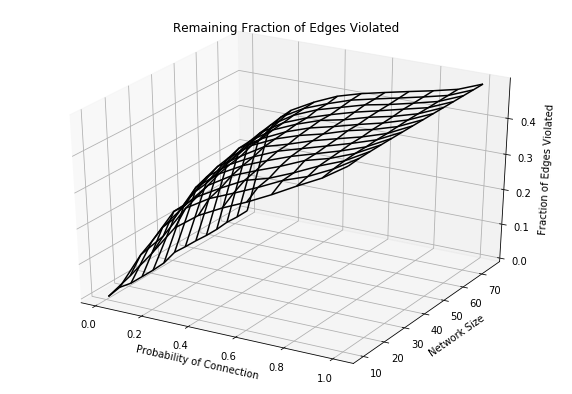

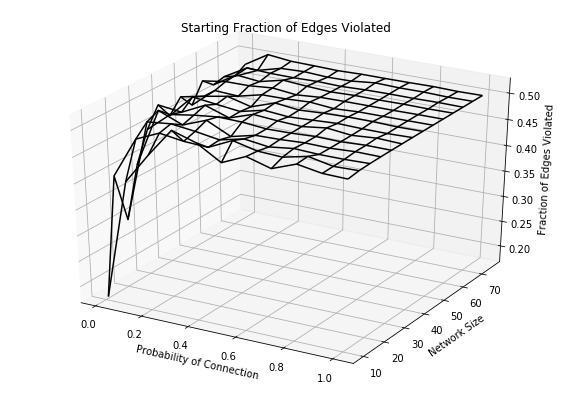

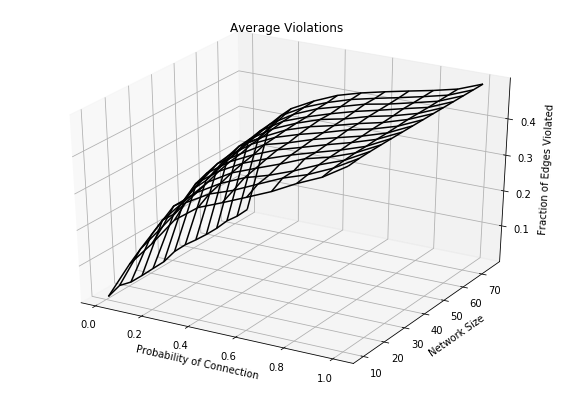

In [34]:
#plot epidemic length 
X, Y = np.meshgrid(probs,n)
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(minSteps), color='black')
#ax.plot_surface(X, Y, np.asarray(minSteps), rstride=1, cstride=1,
#               cmap='viridis', edgecolor='none')
ax.set_title("Remaining Fraction of Edges Violated")
ax.set_xlabel("Probability of Connection")
ax.  set_ylabel("Network Size")
ax.set_zlabel("Fraction of Edges Violated")
plt.savefig("minNorm.png")

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(maxSteps), color='black')
#ax.plot_surface(X, Y, np.asarray(minSteps), rstride=1, cstride=1,
#               cmap='viridis', edgecolor='none')
ax.set_title("Starting Fraction of Edges Violated")
ax.set_xlabel("Probability of Connection")
ax.set_ylabel("Network Size")
ax.set_zlabel("Fraction of Edges Violated")
plt.savefig("maxNorm.png")

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(aveSteps), color='black')
#ax.plot_surface(X, Y, np.asarray(minSteps), rstride=1, cstride=1,
#               cmap='viridis', edgecolor='none')
ax.set_title("Average Violations")
ax.set_xlabel("Probability of Connection")
ax.set_ylabel("Network Size")
ax.set_zlabel("Fraction of Edges Violated")
plt.savefig("aveNorm.png")

In [35]:
def spreadingProcess(G, p):
    #randomly infect one vertex
    infected = [random.choice(list(G.nodes))]
    index = 0
    t = 1
    #while new people are being infected
    while index < len(infected):
        #loop over the new infected people
        num_inf = len(infected)
        while index < num_inf:
            #infect their uninfected neighbors with prob p
            for node in G.neighbors(infected[index]):
                if not node in infected and random.random() <= p:
                    infected.append(node)
            index += 1
        t += 1
    return (len(infected)/len(G), t)